Importing required modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

<h3>Loading The Dataset</h3>

In [5]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Droping unwanted data

In [ ]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<h3>Uni-Variate Analysis</h3>

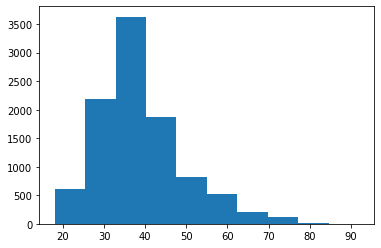

In [ ]:
plt.hist(df.Age)
plt.show()

<h3>Bi-Variate Analysis</h3>


In [ ]:
sns.scatterplot(data=df[:100],x='CreditScore',y='EstimatedSalary',hue='Gender')
plt.xlabel('Credit Score Of the Person')
plt.ylabel('Estimated Salary')
plt.show()


: 

Multi - Variate Analysis

In [ ]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue="Exited")

: 

Descriptive Statistics

In [ ]:
df.describe()

: 

Handling Missing Values

In [ ]:
df.isna().sum()

: 

Visualising the Outliers of Estimated Salary

In [ ]:
sns.boxplot(x=df['EstimatedSalary'])

: 

In [ ]:
df.columns

: 

Check for Categorical columns and perform encoding.

In [ ]:
for col,i in enumerate(df.columns):
  print(col,i,len(df[i].unique()))
  

: 

no of categorical columns : 6
Geography , Gender , NumOfProducts , HasCrCard , IsActiveMember , Exited

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 label = LabelEncoder()
 li = ['Geography' , 'Gender' , 'NumOfProducts' , 'HasCrCard' , 'IsActiveMember' , 'Exited']
 for i in li:
   encoded = label.fit_transform(df[i])
   df.drop(columns=[i],inplace=True)
   df[i] = encoded
df.head()


: 

Split the data into dependent and independent variables.

In [ ]:
#Split the data into Dependent & Independent Variables
print("----------Dependent Variables----------")
X=df.iloc[:,1:4]
print(X)
print("---------Independent Variables---------")
Y=df.iloc[:,4]
print(Y)
print("---------------------------------------")

: 

In [ ]:
X = pd.DataFrame(df.drop(['EstimatedSalary'],axis=1))
Y=pd.DataFrame(df['EstimatedSalary'],columns=['EstimatedSalary'])
X.head()
Y.head()

: 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

: 

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_Y = train_test_split(X,Y,test_size=0.3)

: 